In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_hastie_10_2
import os

In [8]:
from sklearn.preprocessing import StandardScaler as ss

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.decomposition import PCA

In [11]:
data = pd.read_csv("corona.csv")

In [12]:
data.shape

(316800, 27)

In [13]:
data.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [14]:
X = df.loc[: , 'Fever':'Contact_Yes']
y = df.loc[:, 'Severity_Severe']

In [15]:
scale = ss()
X = scale.fit_transform(X)

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
pca = PCA()
out = pca.fit_transform(X)
out.shape

(316800, 26)

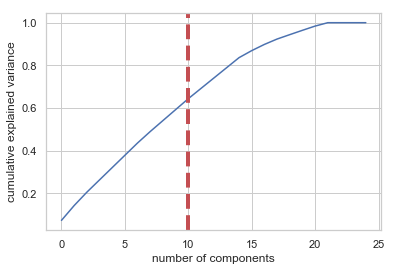

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.073493,0.073493
1,0.142867,0.069374
2,0.205458,0.062590
3,0.263150,0.057692
4,0.320842,0.057692
5,0.378534,0.057692
6,0.436227,0.057692
7,0.489918,0.053691
8,0.541200,0.051282
9,0.592482,0.051282


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
pca_test = PCA(n_components=25)
pca_test.fit(X)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [19]:
final_data = out[:, :10]

In [20]:
final_data.shape

(316800, 10)

In [21]:
final_data[:5,:]

array([[-2.09795881e+00, -1.81371350e+00,  2.19778661e-10,
         1.55032583e+00,  1.72304843e+00, -3.03240036e-01,
        -7.31873894e-01,  4.31755533e-14,  1.33662231e-03,
         3.58203384e-01],
       [-2.09795881e+00, -1.81371350e+00,  9.11343690e-13,
         1.58574906e+00, -5.52542160e-01,  1.65052986e+00,
        -6.75165366e-01,  1.37844546e-13,  1.33662231e-03,
         3.58203384e-01],
       [-2.09795881e+00, -1.81371350e+00, -7.90745309e-11,
         1.58680019e+00, -1.10737875e+00, -1.29654915e+00,
        -7.58114599e-01,  1.34884797e-13,  1.33662231e-03,
         3.58203384e-01],
       [-2.09795881e+00, -1.81371350e+00,  6.33431764e-11,
         1.55032583e+00,  1.72304843e+00, -3.03240036e-01,
        -7.31873894e-01,  4.50273526e-14,  1.66865693e+00,
        -9.82713204e-01],
       [-2.09795881e+00, -1.81371350e+00,  9.50967707e-13,
         1.58574906e+00, -5.52542160e-01,  1.65052986e+00,
        -6.75165366e-01,  2.42419562e-14,  1.66865693e+00,
        -9.

In [22]:
pcdf = pd.DataFrame( data =  final_data,
                    columns = ['pc1', 'pc2','pc3', 'pc4','pc5','pc6','pc7','pc8','pc9','pc10'])

In [23]:
pcdf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,-2.097959,-1.813713,2.197787e-10,1.550326,1.723048,-0.303240,-0.731874,4.317555e-14,0.001337,0.358203
1,-2.097959,-1.813713,9.113437e-13,1.585749,-0.552542,1.650530,-0.675165,1.378445e-13,0.001337,0.358203
2,-2.097959,-1.813713,-7.907453e-11,1.586800,-1.107379,-1.296549,-0.758115,1.348848e-13,0.001337,0.358203
3,-2.097959,-1.813713,6.334318e-11,1.550326,1.723048,-0.303240,-0.731874,4.502735e-14,1.668657,-0.982713
4,-2.097959,-1.813713,9.509677e-13,1.585749,-0.552542,1.650530,-0.675165,2.424196e-14,1.668657,-0.982713


In [24]:
pcdf['target'] = data['Severity_Severe'].map({"1":1,"0":0})

In [25]:
pcdf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,target
0,-2.097959,-1.813713,2.197787e-10,1.550326,1.723048,-0.303240,-0.731874,4.317555e-14,0.001337,0.358203,NaN
1,-2.097959,-1.813713,9.113437e-13,1.585749,-0.552542,1.650530,-0.675165,1.378445e-13,0.001337,0.358203,NaN
2,-2.097959,-1.813713,-7.907453e-11,1.586800,-1.107379,-1.296549,-0.758115,1.348848e-13,0.001337,0.358203,NaN
3,-2.097959,-1.813713,6.334318e-11,1.550326,1.723048,-0.303240,-0.731874,4.502735e-14,1.668657,-0.982713,NaN
4,-2.097959,-1.813713,9.509677e-13,1.585749,-0.552542,1.650530,-0.675165,2.424196e-14,1.668657,-0.982713,NaN


In [26]:
pcdf["target"].fillna('0',limit=268000, inplace = True)
pcdf["target"].fillna('1',limit=48800, inplace = True)
pcdf
pcdf.to_csv('coronapca.csv')

In [27]:
X = pcdf.loc[: , 'pc1':'pc10']
y = pcdf.loc[:,'target']

In [28]:
X.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,-2.097959,-1.813713,2.197787e-10,1.550326,1.723048,-0.303240,-0.731874,4.317555e-14,0.001337,0.358203
1,-2.097959,-1.813713,9.113437e-13,1.585749,-0.552542,1.650530,-0.675165,1.378445e-13,0.001337,0.358203
2,-2.097959,-1.813713,-7.907453e-11,1.586800,-1.107379,-1.296549,-0.758115,1.348848e-13,0.001337,0.358203
3,-2.097959,-1.813713,6.334318e-11,1.550326,1.723048,-0.303240,-0.731874,4.502735e-14,1.668657,-0.982713
4,-2.097959,-1.813713,9.509677e-13,1.585749,-0.552542,1.650530,-0.675165,2.424196e-14,1.668657,-0.982713


In [29]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: object

In [30]:
y.tail()

316795    1
316796    1
316797    1
316798    1
316799    1
Name: target, dtype: object